This notebook implements the gradient descent algorithm for a network with a single neuron with sigmoid activation. As explained in the lecture, This network is equivalent to a logistic regression model and is not a deep neural network but it helps illustrate the gradient descent algorithm.

In [ ]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt


We first start off by creating the tiny training dataset in the lecture consisting of three training examples. This way, you can follow the gradient descent algorithm with the lectures.

In [ ]:
# creating the x and y arrays based on the example in the lecture.
x=np.array([[1,1,0.5],[1,0,0.2]])
y=np.array([1,0,0])
x

array([[1. , 1. , 0.5],
       [1. , 0. , 0.2]])

Now we need to create a set of utility function including:
- __sigmoid__:The activation function
- __initialize__: A function to initialize weights and biases ( for similicity we initialize all the weights to the same initial value passed as an argument to the function
- __network_output__: A function to compute the network output
- __compute_loss__:A function that computes the binary cross entropy loss
- __compute_gradients__: A function that computes the gradients for the weight vector and bias
- __update_parameters__:A function that gets the current value of the parameters as well as their gradient and update them using the gradient descent updating rule
- __gradient_descent__: A function that puts all the above utility functions together to implement the gradient descent algorithm

To simplify the code and computation, we use the vectorized notations; that is, if $m$ is the number of input features and $n$ is the number of training examples:
- $x$: is the matrix of training examples with dimension $m\times n$  
- $w$ is the weight vector of the neuron and has length $m$
- $a$ is the vector of network's output for all trianing examples and has length $n$.
- $y$ is the vector of the observed output for all training examples and has length $n$.
- $z$ is the vector of neuron's linear function for all training examples and has length $n$.

In [ ]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [ ]:
def initialize(weights ,bias):
    b=bias
    w=weights
    return w,b

In [ ]:
def network_output(w,b,x):
    z=np.dot(w.T,x)+b
    a=sigmoid(z)
    return a

In [ ]:
def compute_loss(a,y):
    n=a.shape[0]
    loss = (1 / n) * -np.sum(y * np.log2(a) + (1 - y) * (np.log2(1 - a)))  # compute cost
    return loss


To compute $dw$ in vectorized form, we multiply matrix $x$ with vector $a-y$, that is np.dot(x,(a-y)) performs the following computation:
$$\begin{pmatrix}dw_1 \\dw_2\\ \vdots\\dw_m \end{pmatrix}=\begin{pmatrix} x_{11} & x_{21} & \dots & x_{n1} \\ x_{12} & x_{22} & \dots & x_{n2}\\&& \vdots &\\ x_{1m} & x_{2m} & \dots &x_{nm} \end{pmatrix}\times\begin{pmatrix}a_1-y_1 \\ a_2-y_2 \\ \vdots \\a_n-y_n\end{pmatrix}=\begin{pmatrix}x_{11}(a_1-y_1)+x_{21}(a_2-y_2)+\dots+x_{n1}(a_n-y_n)\\x_{21}(a_1-y_1)+x_{22}(a_2-y_2)+\dots+x_{n2}(a_n-y_n)\\ \vdots\\x_{m1}(a_1-y_1)+x_{m2}(a_2-y_2)+\dots+x_{nm}(a_n-y_n)\end{pmatrix}$$

In [ ]:
def compute_gradients(a,y,x):
    n=x.shape[1]
    '''
     np.dot performs matrix multiplication on x (of dimensions m*n) and vector (a-y) of dimensions n.
     This gives us a vector of the form [dw1 dw2...dwm]
    '''
    dw=1/n*np.dot(x,(a-y))
    db=1/n*np.sum(a-y)
    return dw,db

In [ ]:
def update_parameters(w,b,dw,db, learning_rate):
    w= w-learning_rate*dw
    b=b-learning_rate*db
    return w,b

In [ ]:
def gradient_descent(x,y,initial_weights,initial_b,learning_rate,num_iter):
    n_features=x.shape[0]
    w,b=initialize(initial_weights,0)
    losses=[]
    for i in range(num_iter):
        a=network_output(w,b,x)
        losses.append(compute_loss(a,y))
        dw,db=compute_gradients(a,y,x)
        w,b=update_parameters(w,b,dw,db,learning_rate)
    return losses


We can now call the gradient descent algorithm on the example data (x and y array) and plot the loss function for each iteration. As you can see in the figure, the loss function decreases per iteration of gradient descent. This is because in each iteration of we are updating the parameters towards the direction of the gradient; that is, the direction towards which the loss function has maximum decrease.

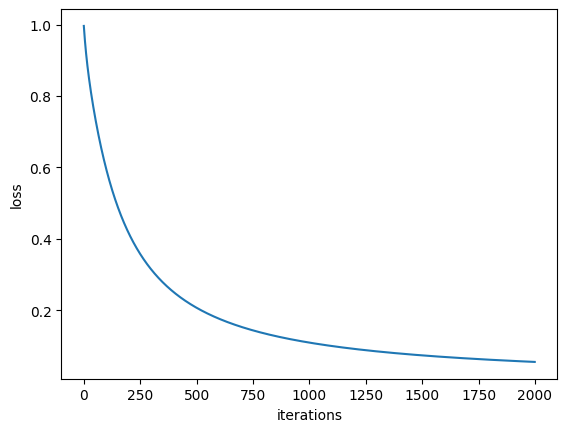

In [ ]:
losses=gradient_descent(x,y,initial_weights= np.array([0.1,0.1]),initial_b=0,learning_rate=0.1,num_iter=2000)
#plotting the loss function for each iteration of gradient descent
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()